# Analysis 3

## -- Pre-Processing --

Imports:

In [3]:
import pandas as pd

1. Generate pp5.csv from pp4.csv \
\
Additional Columns: [pips, dScore]

In [4]:
def pp5():
    # Load Dataframe
    df = pd.read_csv('pp4.csv')

    # Define dictionary for pips
    d = {2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

    # Define a function to compute pips
    def compute_pips(row):
        return sum([d.get(row[col], 0) for col in ['settlement1', 'Unnamed: 17', 'Unnamed: 19', 'settlement2', 'Unnamed: 23', 'Unnamed: 25']])

    # Apply the function to each row of the DataFrame to create the new 'pips' column
    df['pips'] = df.apply(compute_pips, axis=1)

    # Compute dScore by calculating amount of unique data in a row
    df['dScore'] = df[['Unnamed: 16', 'Unnamed: 18', 'Unnamed: 20', 'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 26']].nunique(axis=1)

    df.to_csv('pp5.csv', index=False)

In [5]:
pp5()

pp5: Main data to be used for analysis

# -- Data Visualization --

Seeing the importance of diversity of resource

Imports:

In [6]:
import matplotlib.pyplot as plt

1. Load data into dataframes

In [7]:
df = pd.read_csv('pp5.csv')

2. Breakdown data by its 'dScore'

In [8]:
df_d3 = df[(df['dScore'] == 3)]
df_d4 = df[(df['dScore'] == 4)]
df_d5 = df[(df['dScore'] == 5)]

3. Generate values of interest

In [19]:
# Generate statistics
print('\nAverage Points:')
print('d3: ' + (str)(df_d3.mean(numeric_only=True)['points']))
print('d4: ' + (str)(df_d4.mean(numeric_only=True)['points']))
print('d5: ' + (str)(df_d5.mean(numeric_only=True)['points']))

print('\nWin Percentage:')
print('d3: ' + (str)(df_d3.mean(numeric_only=True)['win']))
print('d4: ' + (str)(df_d4.mean(numeric_only=True)['win']))
print('d5: ' + (str)(df_d5.mean(numeric_only=True)['win']))

Average Pips:
d3: 20.933333333333334
d4: 20.8
d5: 20.372881355932204

Average Points:
d3: 6.533333333333333
d4: 7.4125
d5: 7.627118644067797

Win Percentage:
d3: 0.13333333333333333
d4: 0.275
d5: 0.288135593220339


4. Graphing values of interest

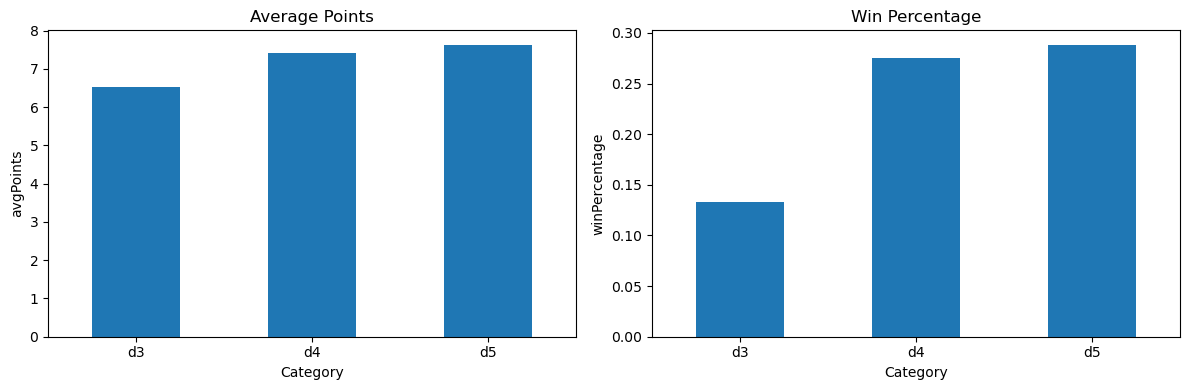

In [23]:
# Create a dataframe
graph = pd.DataFrame({'category': ['d3', 'd4', 'd5'],
                    'avgPoints': [df_d3.mean(numeric_only=True)['points'], 
                                  df_d4.mean(numeric_only=True)['points'], 
                                  df_d5.mean(numeric_only=True)['points']],
                    'winPercentage': [df_d3.mean(numeric_only=True)['win'], 
                                  df_d4.mean(numeric_only=True)['win'], 
                                  df_d5.mean(numeric_only=True)['win']]})

# Create a subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot on a separate subplot
graph.plot(kind='bar', x='category', y='avgPoints', rot=0, ax=axs[0], legend=False)
graph.plot(kind='bar', x='category', y='winPercentage', rot=0, ax=axs[1], legend=False)

# Set the plot title and axis labels for each subplot
axs[0].set_title("Average Points")
axs[0].set_xlabel("Category")
axs[0].set_ylabel("avgPoints")
axs[1].set_title("Win Percentage")
axs[1].set_xlabel("Category")
axs[1].set_ylabel("winPercentage")


# Adjust the layout and spacing of subplots
plt.tight_layout()

# Display the plot
plt.show()

5. Generate extra information for further analysis

In [21]:
# Average Pips
print('Average Pips:')
print('d3: ' + (str)(df_d3.mean(numeric_only=True)['pips']))
print('d4: ' + (str)(df_d4.mean(numeric_only=True)['pips']))
print('d5: ' + (str)(df_d5.mean(numeric_only=True)['pips']))

# Average Production
print('\nAverage Production:')
print('d3: ' + (str)(df_d3.mean(numeric_only=True)['production']))
print('d4: ' + (str)(df_d4.mean(numeric_only=True)['production']))
print('d5: ' + (str)(df_d5.mean(numeric_only=True)['production']))


Average Pips:
d3: 20.933333333333334
d4: 20.8
d5: 20.372881355932204

Average Production:
d3: 49.53333333333333
d4: 53.2875
d5: 55.016949152542374


6. Graphing extra information

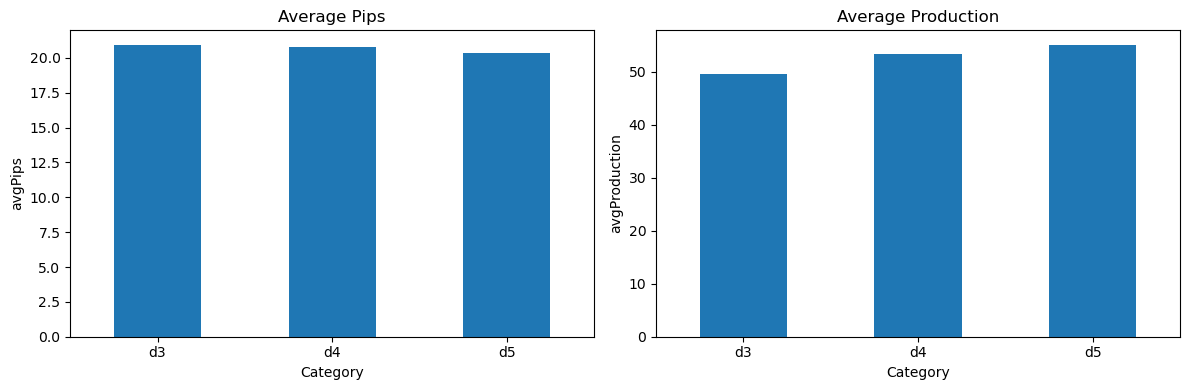

In [24]:
# Create a dataframe
graph = pd.DataFrame({'category': ['d3', 'd4', 'd5'],
                    'avgPoints': [df_d3.mean(numeric_only=True)['pips'], 
                                  df_d4.mean(numeric_only=True)['pips'], 
                                  df_d5.mean(numeric_only=True)['pips']],
                    'winPercentage': [df_d3.mean(numeric_only=True)['production'], 
                                  df_d4.mean(numeric_only=True)['production'], 
                                  df_d5.mean(numeric_only=True)['production']]})

# Create a subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot on a separate subplot
graph.plot(kind='bar', x='category', y='avgPoints', rot=0, ax=axs[0], legend=False)
graph.plot(kind='bar', x='category', y='winPercentage', rot=0, ax=axs[1], legend=False)

# Set the plot title and axis labels for each subplot
axs[0].set_title("Average Pips")
axs[0].set_xlabel("Category")
axs[0].set_ylabel("avgPips")
axs[1].set_title("Average Production")
axs[1].set_xlabel("Category")
axs[1].set_ylabel("avgProduction")


# Adjust the layout and spacing of subplots
plt.tight_layout()

# Display the plot
plt.show()